Tutorial https://colab.research.google.com/drive/1KBwzNlexu9So5IM_Zh2s2Oh8rieSXcy-?usp=sharing#scrollTo=UxQa6oGj4qb7

In [6]:
# importando os pacotes necessários
from pycaret.classification import setup, compare_models, models, create_model, predict_model
from pycaret.classification import tune_model, plot_model, evaluate_model, finalize_model
from pycaret.classification import save_model, load_model

# Dados

In [1]:
# importando os dados
from pycaret.datasets import get_data
data = get_data('credit')

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,90000,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
2,50000,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
3,50000,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
4,50000,1,1,2,37,0,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0


In [3]:
data.shape

(24000, 24)

In [4]:
# separando os dados em teste e treino
test = data.sample(frac=0.10)
train = data.drop(test.index)

test.reset_index(inplace=True, drop=True)
train.reset_index(inplace=True, drop=True)

In [5]:
# verificando o formato dos conjuntos
print(train.shape)
print(test.shape)

(21600, 24)
(2400, 24)


## Modelo

In [7]:
# criando o setup do PyCaret
clf = setup(data=train, target='default')

,Description,Value
0,session_id,7279
1,Target,default
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(21600, 24)"
5,Missing Values,False
6,Numeric Features,14
7,Categorical Features,9
8,Ordinal Features,False
9,High Cardinality Features,False


In [9]:
# criando o pipeline
clf = setup(data = data,
            target = 'default',
            normalize = True,
            transformation = True, 
            ignore_low_variance = True,
            remove_multicollinearity = True, multicollinearity_threshold = 0.95,
            bin_numeric_features = ['LIMIT_BAL', 'AGE'],
            group_features = [['BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'],
            ['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']],
            log_experiment = True,
            experiment_name = 'credit1')

,Description,Value
0,session_id,8086
1,Target,default
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(24000, 24)"
5,Missing Values,False
6,Numeric Features,14
7,Categorical Features,9
8,Ordinal Features,False
9,High Cardinality Features,False


In [10]:
# best = compare_models()
best = compare_models(sort='Recall')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.4310,0.6652,0.8450,0.2591,0.3966,0.0875,0.1467,0.1190
qda,Quadratic Discriminant Analysis,0.4223,0.6760,0.8317,0.2998,0.3957,0.1043,0.1595,0.6680
dt,Decision Tree Classifier,0.7240,0.6135,0.4119,0.3846,0.3976,0.2190,0.2192,0.5230
lda,Linear Discriminant Analysis,0.8200,0.7743,0.3724,0.6677,0.4777,0.3795,0.4033,1.2930
catboost,CatBoost Classifier,0.8181,0.7763,0.3629,0.6636,0.4685,0.3701,0.3950,16.2250
lightgbm,Light Gradient Boosting Machine,0.8172,0.7728,0.3616,0.6587,0.4664,0.3673,0.3916,0.5100
et,Extra Trees Classifier,0.8114,0.7491,0.3592,0.6294,0.4569,0.3531,0.3736,4.1840
rf,Random Forest Classifier,0.8147,0.7584,0.3589,0.6470,0.4612,0.3603,0.3834,3.0900
gbc,Gradient Boosting Classifier,0.8214,0.7752,0.3575,0.6847,0.4692,0.3744,0.4033,8.0770
ridge,Ridge Classifier,0.8214,0.0000,0.3535,0.6879,0.4666,0.3725,0.4025,0.1420


In [11]:
# verificando o melhor modelo
print(best)

GaussianNB(priors=None, var_smoothing=1e-09)


In [12]:
# verificando os modelos
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,pycaret.internal.tunable.TunableMLPClassifier,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [22]:
# instanciando o modelo
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7161,0.6045,0.3989,0.3682,0.3829,0.1989,0.1992
1,0.7268,0.6160,0.4151,0.3889,0.4016,0.2248,0.2250
2,0.7345,0.6200,0.4140,0.4031,0.4085,0.2374,0.2374
3,0.7274,0.6324,0.4624,0.4000,0.4289,0.2511,0.2522
4,0.7149,0.6005,0.3925,0.3659,0.3787,0.1940,0.1942
5,0.7155,0.6011,0.3844,0.3648,0.3743,0.1904,0.1905
6,0.7262,0.6229,0.4382,0.3937,0.4148,0.2367,0.2373
7,0.7310,0.6166,0.4059,0.3953,0.4005,0.2271,0.2272
8,0.7315,0.6187,0.4140,0.3979,0.4058,0.2325,0.2326
9,0.7165,0.6021,0.3935,0.3678,0.3802,0.1967,0.1969


In [23]:
# verificando os parâmetros
print(dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=8086, splitter='best')


In [24]:
# tuning de parâmetros
tuned_dt = tune_model(dt, optimize='Recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8202,0.7066,0.3558,0.6769,0.4664,0.3707,0.3984
1,0.8185,0.7348,0.3423,0.6755,0.4544,0.3592,0.3891
2,0.8208,0.7367,0.3253,0.7076,0.4457,0.3558,0.3942
3,0.8190,0.7355,0.3387,0.6848,0.4532,0.3593,0.3914
4,0.8143,0.7449,0.3360,0.6579,0.4448,0.3471,0.3754
5,0.8131,0.7104,0.2823,0.6908,0.4008,0.3124,0.3565
6,0.8202,0.7567,0.3790,0.6651,0.4829,0.3838,0.4061
7,0.8202,0.7677,0.3387,0.6923,0.4549,0.3621,0.3953
8,0.8244,0.7525,0.3522,0.7081,0.4704,0.3790,0.4123
9,0.8189,0.7299,0.3315,0.6872,0.4473,0.3544,0.3882


In [25]:
# veriificando os parâmetros
print(tuned_dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=8086, splitter='best')


# Plot Model

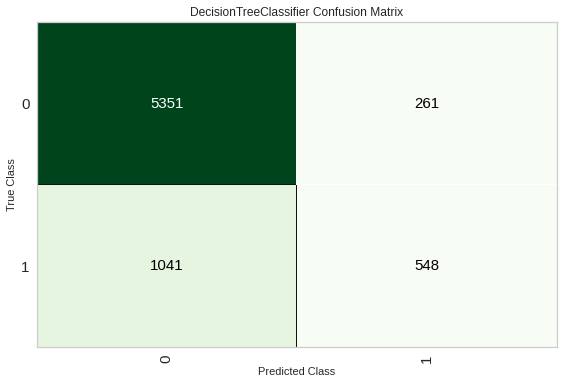

In [26]:
# plotando matriz de confusão
plot_model(tuned_dt, plot='confusion_matrix')

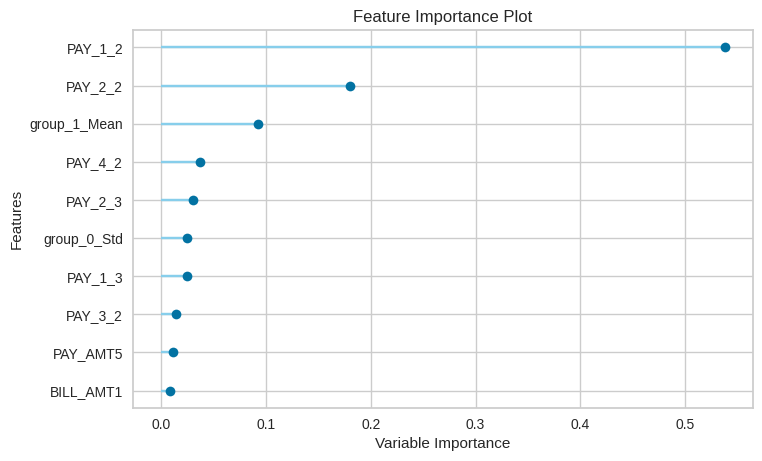

In [27]:
# feature importances
plot_model(tuned_dt, plot='feature')

In [29]:
# avaliando o modelo
evaluate_model(tuned_dt)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(use_train_data=False, groups=None, feature_name=None, fit_kwargs=None, fold=None, estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=8086, splitter='best'))


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [31]:
# fazendo previsões
predict_model(tuned_dt)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(display=None, ml_usecase=MLUsecase.CLASSIFICATION, verbose=True, round=4, encoded_labels=False, probability_threshold=None, estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=8086, splitter='best'))
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.8192,0.7418,0.3449,0.6774,0.4570,0.3621,0.3918


,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,...,AGE_3.0,AGE_4.0,AGE_5.0,AGE_6.0,AGE_7.0,AGE_8.0,AGE_9.0,default,Label,Score
0,1.120443,1.201357,1.273999,1.321362,1.410973,1.110361,0.273955,0.661480,0.323032,0.456006,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.8920
1,0.231347,0.347873,0.428620,0.445418,0.585714,0.355966,-0.286042,-0.302093,-0.427105,0.339134,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.8920
2,-0.945479,-0.848457,-0.840633,-0.462551,-0.413876,-0.311534,-0.114725,-1.227075,1.244870,-1.101804,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0,0.7260
3,-1.110992,-1.106843,-1.110964,-1.001369,-1.084299,-0.854405,-0.833620,-0.906133,-0.335720,-0.718189,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0.7416
4,-0.986823,-0.988437,-0.999763,-1.033041,-1.000762,-0.713262,-0.493831,-0.464489,-0.637299,-0.031210,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.8920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7196,1.000705,-0.448996,0.020098,-0.431253,-0.364292,1.420142,1.830195,2.094732,-0.579722,1.839713,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0.8920
7197,1.135408,1.252914,1.347804,1.447990,1.528261,1.533451,1.224736,1.483778,1.583396,0.859759,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.8920
7198,0.357863,0.342952,0.397048,-0.263025,-0.282788,-0.195915,1.447270,1.978508,0.292768,1.178064,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.8920
7199,0.934235,0.995772,1.066501,1.116849,1.248779,1.123839,-1.266301,0.328131,0.290637,0.439223,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.6047


In [32]:
# finalizando o modelo
final_dt = finalize_model(tuned_dt)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(display=None, model_only=True, groups=None, fit_kwargs=None, estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=8086, splitter='best'))
INFO:logs:Finalizing DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=8086,

In [33]:
# verificando os parâmetros
print(final_dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=8086, splitter='best')


In [34]:
# fazendo previsões com conjunto de teste
test_preds = predict_model(final_dt, data=test)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(display=None, ml_usecase=MLUsecase.CLASSIFICATION, verbose=True, round=4, encoded_labels=False, probability_threshold=None, estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=8086, splitter='best'))
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


In [35]:
# importando pacote de avaliação
from pycaret.utils import check_metric

In [36]:
# avaliando o resultado com dados de teste
check_metric(test_preds.default, test_preds.Label.astype(int), 'Recall')

0.3189